Importing all the necessary libraries from Python

In [136]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

Importing the dataset using pandas

In [45]:
df1 = pd.read_csv('mark.csv')
df2 = pd.read_csv('student.csv')

Below is to display the first five data from the Mark.csv

In [85]:
df1.head()

,Student_id,Mark,City
0,1,95,Chennai
1,2,70,Delhi
2,3,98,Mumbai
3,4,75,Pune
4,5,89,Kochi


Also from the same Mark.csv, the below code is to give more details about the data.
This shows the number of columns, rows and the data types.

In [86]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Student_id  232 non-null    int64 
 1   Mark        232 non-null    int64 
 2   City        232 non-null    object
dtypes: int64(2), object(1)
memory usage: 5.6+ KB


Below is to display the first five data from the student.csv

In [106]:
df2.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


Below code displayed the same student.csv details about the data. This shows the number of columns, rows and the data types.

In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Student_id  232 non-null    int64 
 1   Age         232 non-null    int64 
 2   Gender      232 non-null    object
 3   Grade       232 non-null    object
 4   Employed    232 non-null    object
dtypes: int64(2), object(3)
memory usage: 9.2+ KB


In [108]:
# The two data will be merged together
combined_df = pd.merge(df1,df2)

In [109]:
# The new data display afther the merged
combined_df.head()

,Student_id,Mark,City,Age,Gender,Grade,Employed
0,1,95,Chennai,19,Male,1st Class,yes
1,2,70,Delhi,20,Female,2nd Class,no
2,3,98,Mumbai,18,Male,1st Class,no
3,4,75,Pune,21,Female,2nd Class,no
4,5,89,Kochi,19,Male,1st Class,no


In [110]:
#the combined_df is the combined data that will now be transformed, the display shows that the count is giving the same data
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Student_id  232 non-null    int64 
 1   Mark        232 non-null    int64 
 2   City        232 non-null    object
 3   Age         232 non-null    int64 
 4   Gender      232 non-null    object
 5   Grade       232 non-null    object
 6   Employed    232 non-null    object
dtypes: int64(3), object(4)
memory usage: 12.8+ KB


In [111]:
#checking for any null or blank rows within the dataset, this is to sum the number of blank or null rows
combined_df.isnull().sum()

Student_id    0
Mark          0
City          0
Age           0
Gender        0
Grade         0
Employed      0
dtype: int64

In [112]:
#this display shows the statistical interpretation of the data
combined_df.describe()

,Student_id,Mark,Age
count,232.000000,232.000000,232.000000
mean,116.500000,71.400862,19.896552
std,67.116814,17.116069,1.030944
min,1.000000,40.000000,18.000000
25%,58.750000,55.000000,19.000000
50%,116.500000,75.000000,20.000000
75%,174.250000,85.250000,21.000000
max,232.000000,100.000000,22.000000


In [113]:
#the count of yes and no response under the employed column
combined_df["Employed"].value_counts()

Employed
no     133
yes     99
Name: count, dtype: int64

In [114]:
#the count of grades response under the grade column, this will display total number of students with grades
combined_df["Grade"].value_counts()

Grade
2nd Class    80
3rd Class    80
1st Class    72
Name: count, dtype: int64

In [115]:
# Convert 'yes' to 1, other values to 0
combined_df['Employed'] = combined_df['Employed'].apply(lambda x: 1 if x == 'yes' else 0)

In [116]:
combined_df.describe()

,Student_id,Mark,Age,Employed
count,232.000000,232.000000,232.000000,232.000000
mean,116.500000,71.400862,19.896552,0.426724
std,67.116814,17.116069,1.030944,0.495671
min,1.000000,40.000000,18.000000,0.000000
25%,58.750000,55.000000,19.000000,0.000000
50%,116.500000,75.000000,20.000000,0.000000
75%,174.250000,85.250000,21.000000,1.000000
max,232.000000,100.000000,22.000000,1.000000


In [117]:
# Define a mapping dictionary
grade_mapping = {'1st Class': 3, '2nd Class': 2, '3rd Class': 1}

In [118]:
# Apply the mapping to the Grade column, then create another column for numeric grade
combined_df['Numeric Grade'] = combined_df['Grade'].map(grade_mapping)

In [119]:
combined_df.head()

,Student_id,Mark,City,Age,Gender,Grade,Employed,Numeric Grade
0,1,95,Chennai,19,Male,1st Class,1,3
1,2,70,Delhi,20,Female,2nd Class,0,2
2,3,98,Mumbai,18,Male,1st Class,0,3
3,4,75,Pune,21,Female,2nd Class,0,2
4,5,89,Kochi,19,Male,1st Class,0,3


In [120]:
combined_df.describe()

,Student_id,Mark,Age,Employed,Numeric Grade
count,232.000000,232.000000,232.000000,232.000000,232.000000
mean,116.500000,71.400862,19.896552,0.426724,1.965517
std,67.116814,17.116069,1.030944,0.495671,0.810441
min,1.000000,40.000000,18.000000,0.000000,1.000000
25%,58.750000,55.000000,19.000000,0.000000,1.000000
50%,116.500000,75.000000,20.000000,0.000000,2.000000
75%,174.250000,85.250000,21.000000,1.000000,3.000000
max,232.000000,100.000000,22.000000,1.000000,3.000000


In [121]:
combined_df["Numeric Grade"].value_counts()

Numeric Grade
2    80
1    80
3    72
Name: count, dtype: int64

In [122]:
#the count of gender to know the number of males and females, also to check for consistences 
combined_df["Gender"].value_counts()

Gender
Male      136
Female     96
Name: count, dtype: int64

In [123]:
# Convert 'Male' to 1, other values to 0
combined_df['Gender'] = combined_df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [124]:
combined_df.head()

,Student_id,Mark,City,Age,Gender,Grade,Employed,Numeric Grade
0,1,95,Chennai,19,1,1st Class,1,3
1,2,70,Delhi,20,0,2nd Class,0,2
2,3,98,Mumbai,18,1,1st Class,0,3
3,4,75,Pune,21,0,2nd Class,0,2
4,5,89,Kochi,19,1,1st Class,0,3


Let us make some visuals about the data, this can help to ascertain if the data has some outliers

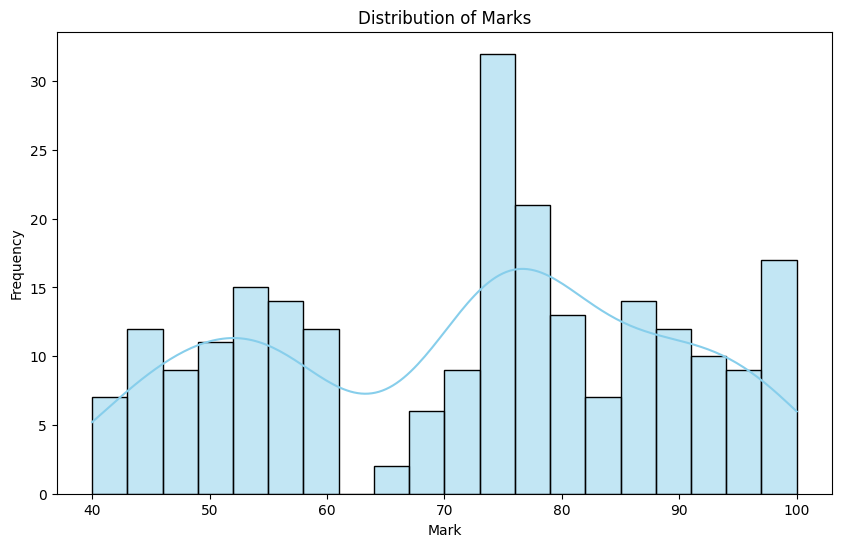

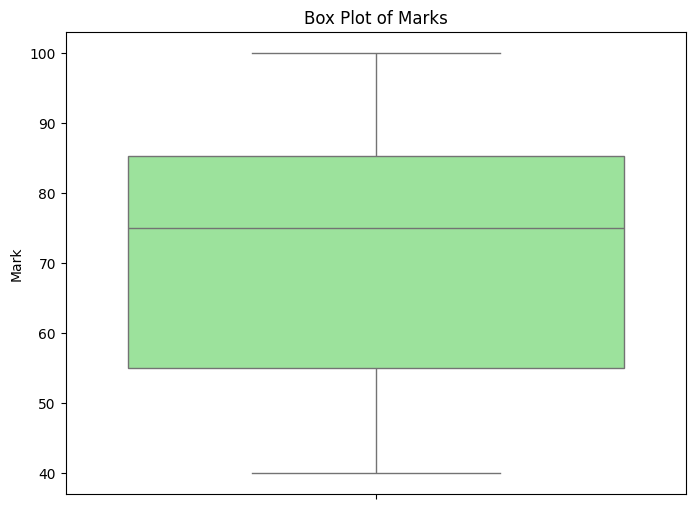

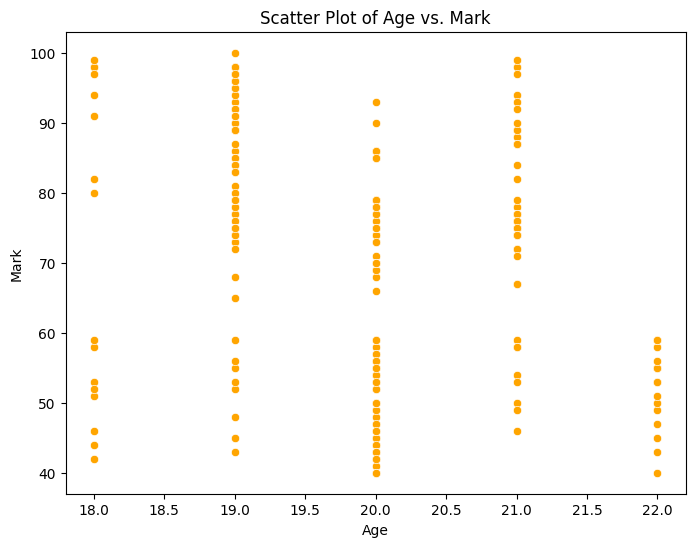

In [125]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_df, x='Mark', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Marks')
plt.xlabel('Mark')
plt.ylabel('Frequency')
plt.show()

# Plot box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df, y='Mark', color='lightgreen')
plt.title('Box Plot of Marks')
plt.ylabel('Mark')
plt.show()

# If you have additional numerical features to compare with 'Mark', you can use a scatter plot
# For example, if you have 'Age' as another feature
plt.figure(figsize=(8, 6))
sns.scatterplot(data=combined_df, x='Age', y='Mark', color='orange')
plt.title('Scatter Plot of Age vs. Mark')
plt.xlabel('Age')
plt.ylabel('Mark')
plt.show()

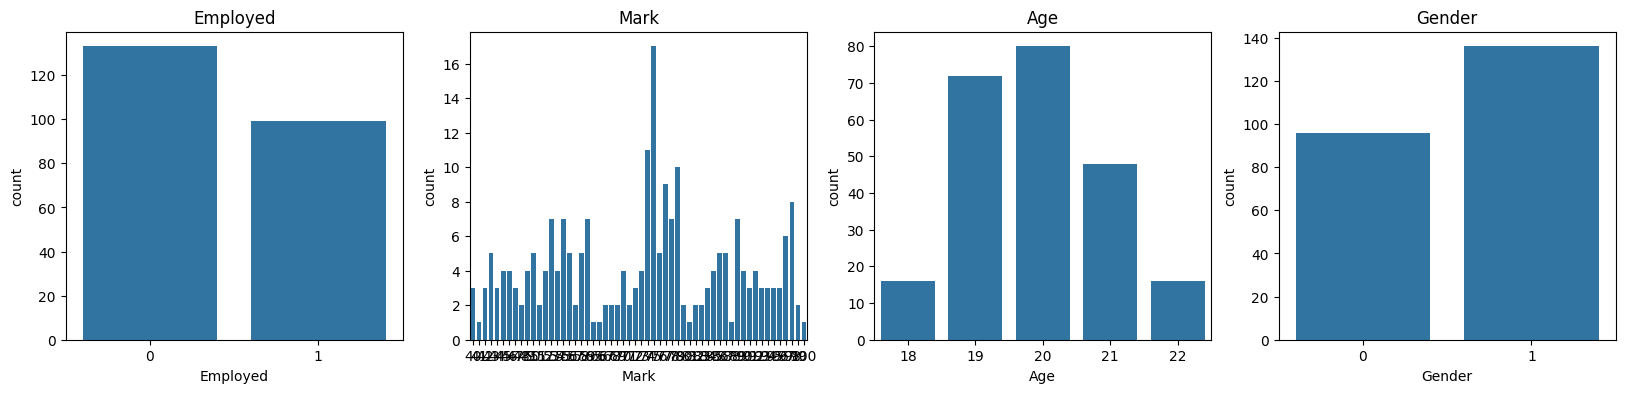

In [126]:
combined_df_columns = ["Employed","Mark","Age","Gender"]
nums = combined_df_columns

plt.figure(figsize=(20,4))

for i, column in enumerate(nums):
    axs = plt.subplot(1, len(nums), i+1)
    sns.countplot(x=str(column), data=combined_df)
    axs.set_title(f"{column}")

The fact is visuals might not be actual to determine outliers. Therefore, we going to test through Interquartile Range (IQR)

In [127]:
# Calculate quartiles (25th and 75th percentile)
Q1 = combined_df['Mark'].quantile(0.25)
Q3 = combined_df['Mark'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Identify potential outliers (data points below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR)
outliers = combined_df[(combined_df['Mark'] < (Q1 - 1.5 * IQR)) | (combined_df['Mark'] > (Q3 + 1.5 * IQR))]

# Print some information about outliers (optional)
print(f"Number of potential outliers: {len(outliers)}")
# You can explore the 'outliers' DataFrame to see the specific data points

# Print IQR value
print(f"Interquartile Range (IQR): {IQR}")

Number of potential outliers: 0
Interquartile Range (IQR): 30.25


In [128]:
# Define features and target variable
features = ['Mark', 'Age', 'Gender', 'Employed']  # Assuming one-hot encoded gender
target = 'Numeric Grade'

# Split data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(combined_df[features], combined_df[target], test_size=0.2, random_state=42)

# Print the shapes of training and testing sets (optional)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (185, 4)
X_test shape: (47, 4)
y_train shape: (185,)
y_test shape: (47,)


In [129]:
# Split data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(combined_df[features], combined_df[target], test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [135]:
# Trained model (from Cell 6)
model = model.fit(X_train, y_train)  # Replace with your model variable name

# Assuming 'Gender' is the only feature for prediction
X_test = pd.DataFrame({
    'Mark': [50, 60, 70, 80, 90],  # Example values for 'Mark'
    'Age': [21, 22, 23, 24, 25],  # Example values for 'Age'
    'Gender': [1, 0, 1, 0, 1],  # Example values for 'Gender'
    'Employed': [1, 1, 0, 0, 1]  # Example values for 'Employed'
})

# Use the trained model to predict grades on the testing set
y_predicted = model.predict(X_test)

# Print the predicted grades for all data points
print(f"Predicted Grades:\n{y_predicted}")

Predicted Grades:
[1.01856671 1.3444881  1.89142816 2.21734955 2.65868623]


In [138]:
# Assuming 'Employed' is the target variable indicating employment status (1 for employed, 0 for not employed)
X = combined_df[['Mark', 'Age', 'Gender']]  # Features
y = combined_df['Employed']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the testing set
y_predicted = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_predicted)
print("Accuracy:", accuracy)

Accuracy: 0.6170212765957447


In [147]:
# Assuming 'Mark', 'Age', and 'Gender' are the features used for prediction
features = ['Mark', 'Age', 'Gender']  # Assuming one-hot encoded gender
target = 'Employed'

# Create the logistic regression model
logistic_model = LogisticRegression()

# Train the model using the entire dataset
logistic_model.fit(combined_df[features], combined_df[target])

# Assuming 'X_new' is the new data for prediction
X_new = pd.DataFrame({
    'Mark': [60, 70],  # Example values for 'Mark'
    'Age': [22, 23],   # Example values for 'Age'
    'Gender': [1, 0],  # Example values for 'Gender'
})

# Make predictions on the new data
predictions = logistic_model.predict(X_new)

# Print the predictions
print("Predictions on Employed:", predictions)

Predictions on Employed: [1 1]


In [146]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
conf_matrix = confusion_matrix(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_predicted)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC Score', 'Confusion Matrix'],
    'Value': [accuracy, precision, recall, f1, roc_auc, conf_matrix]
})

# Print the results
print(results_df)

             Metric               Value
0          Accuracy            0.617021
1         Precision            0.230769
2            Recall            0.272727
3          F1-score                0.25
4     ROC AUC Score            0.497475
5  Confusion Matrix  [[26, 10], [8, 3]]
